#Training data size
by Linh Van Nguyen <contact@linhvannguyen.com>

as a part of the demonstration galeries for <a href='http://scikit-learn.org/stable/'>sklearn</a> Machine Learning python package.

------------

Stochastic Gradient Descent is a simple yet very efficient method to solve large-scale Machine Learning problems. The idea of SGD is to solve an optimization problem by searching for the minima by updating the model along the direction of descending the cost function's gradient. The model is updated in an "online" way by using recursively each of the shuffled samples.   

### Examples: recognition of hand-written digits 

This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.

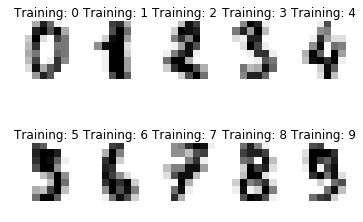

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#Load the digits dataset
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

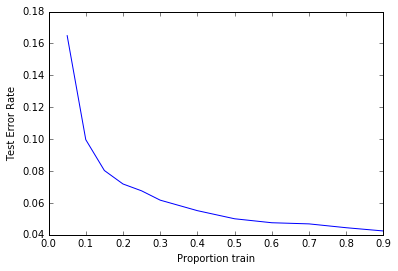

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

heldout = [0.95, 0.90, 0.85, 0.8, 0.75, 0.7, 0.6, 0.50, 0.40, 0.3, 0.20, 0.1]
heldint = 1. - np.array(heldout)

num_iters = 30
X, y = digits.data, digits.target

# check also minibatch SGD (http://stackoverflow.com/questions/15036630/batch-gradient-descent-with-scikit-learn-sklearn_
name, clf = ("Average SGD", SGDClassifier(loss='log',average=True))

rng = np.random.RandomState(42)
yy = []
for i in heldout:
    yy_ = []
    for r in range(num_iters):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=rng)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        yy_.append(1 - np.mean(y_pred == y_test))
    yy.append(np.mean(yy_))
plt.plot(heldint, yy, label=name)

plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()


Remarks:

* One should check the convergence of the training by looking at the error curve as function of number of iterations

* The curve showing here is not convergence curve of the training, but showing the error as percentage of data used for training. One notice that larger set of training data gives smaller prediction error. By observing this kind of curve, one can decide also whether it is worth to collect more data for training or not.

* From the plot, it seems Stochastic Average Gradient descent work well in practice